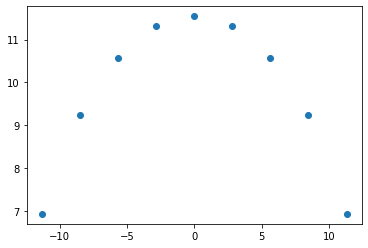

In [2]:
import tensorflow as tf
import matplotlib.pyplot as pit
import math
import random as rd
import pylab as pl

a = 2
b = 3
r= 20

y=[]

xMin = math.sqrt(r * r / a) * -1

x=pl.linspace(xMin,xMin*-1,11)
x=x[1:10]

for i in x:
    #print("r %f, i %f"%(r,i))
    temp = math.sqrt((r * r - a * i * i)/b) #+ rd.randint(-2,2)
    y.append(temp)

x=list(x)

pit.scatter(x,y,label="input data set")

In [3]:
# 비선형 모델 클래스 
class CircleModel:
    def __call__(self, x):
        return (self.a * x * x - self.r * self.r)/self.b
    
    def __init__(self):
        self.a = tf.Variable(0.)
        self.b = tf.Variable(0.)
        self.r = tf.Variable(0.)

# 오차(손실) 구하기 함수
def loss(y, pred):
    return tf.reduce_mean(tf.square(y - pred))

# 학습 함수
def train(circle_model, x, y, lr):
    with tf.GradientTape() as t:
        current_loss = loss(y, circle_model(x))

    lr_a, lr_b, lr_r = t.gradient(current_loss, [circle_model.a, circle_model.b, circle_model.r])
    circle_model.a.assign_sub(lr * lr_a)
    circle_model.b.assign_sub(lr * lr_b)
    circle_model.r.assign_sub(lr * lr_r)

0:: a:nan b:nan r:nan Loss: nan 


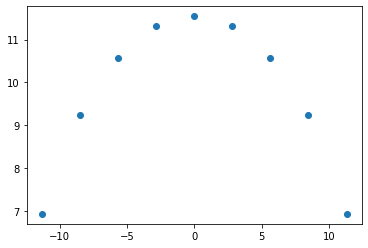

1000:: a:nan b:nan r:nan Loss: nan 


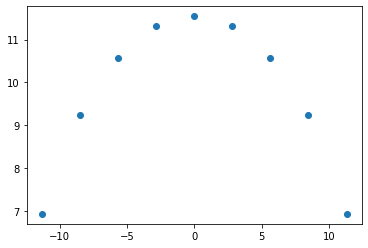

2000:: a:nan b:nan r:nan Loss: nan 


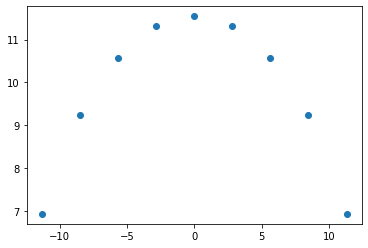

3000:: a:nan b:nan r:nan Loss: nan 


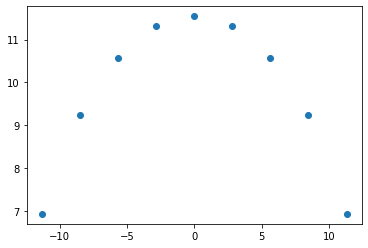

4000:: a:nan b:nan r:nan Loss: nan 


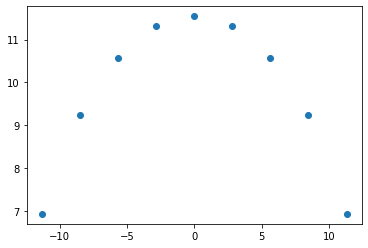

5000:: a:nan b:nan r:nan Loss: nan 


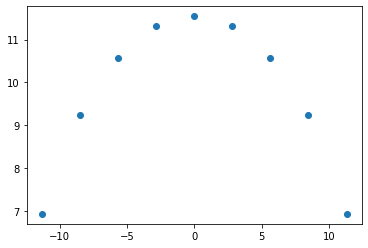

6000:: a:nan b:nan r:nan Loss: nan 


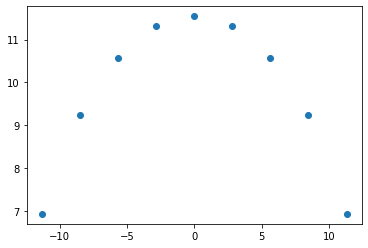

7000:: a:nan b:nan r:nan Loss: nan 


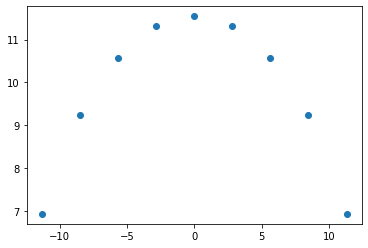

8000:: a:nan b:nan r:nan Loss: nan 


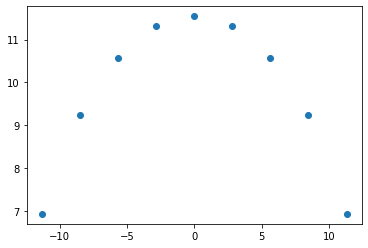

9000:: a:nan b:nan r:nan Loss: nan 


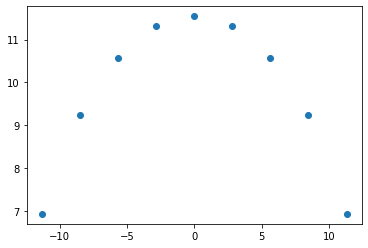

10000:: a:nan b:nan r:nan Loss: nan 


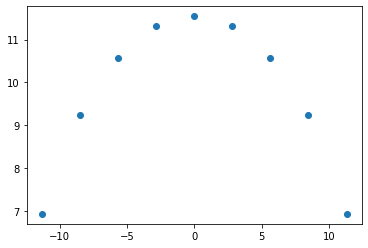

In [4]:
# 학습 진행
circle_model = CircleModel()
epochs = 10000

line = []

for epoch_count in range(epochs + 1):
    real_loss = loss(y, circle_model(x))
    train(circle_model, x, y, lr=0.003)
    
    if epoch_count % 1000 == 0:
        print(f"{epoch_count}:: a:{circle_model.a.numpy()} b:{circle_model.b.numpy()} r:{circle_model.r.numpy()} Loss: {real_loss.numpy()} ")
        
        tmp_x=[a for a in x]
        tmp_y=[(circle_model.r.numpy() * circle_model.r.numpy() - circle_model.a.numpy() *b * b)/circle_model.b.numpy() for b in x]
        pit.close()
        pit.scatter(x,y,label="input data set")
        pit.plot(tmp_x,tmp_y)
        for i in line:
            pit.plot(i[0],i[1])
        if(epoch_count!=0):
            line.append([tmp_x,tmp_y])
        pit.show()

In [ ]:
#실패!